# Data Science and Business Analytics Internship-Dec20
#### GRIP @ The Sparks Foundation
### Create the Decision Tree classifier and visualize it graphically. 
### Task-6 Prediction using Decision Tree Algorithm
### Author: Abu Bakkar Siddikk
##### Batch: December-2020

In [68]:
# Import Neccessary Dependency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import mglearn
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
from IPython.display import display
from io import StringIO

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [8]:
# To Load Dataset
ds = pd.read_csv('IRIS.csv')

In [9]:
# To see the first five row
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# To see the dataset Information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# To see the description of dataset
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
# To see the Correlation 
corr = ds.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

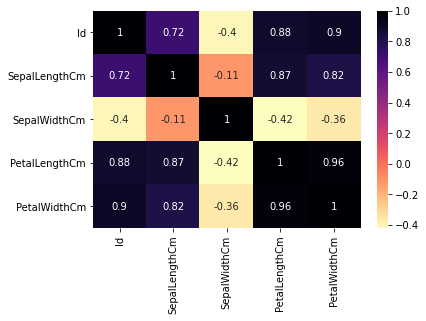

In [35]:
sns.heatmap(corr, annot=True, cmap='magma_r')

In [37]:
# to see null value
ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

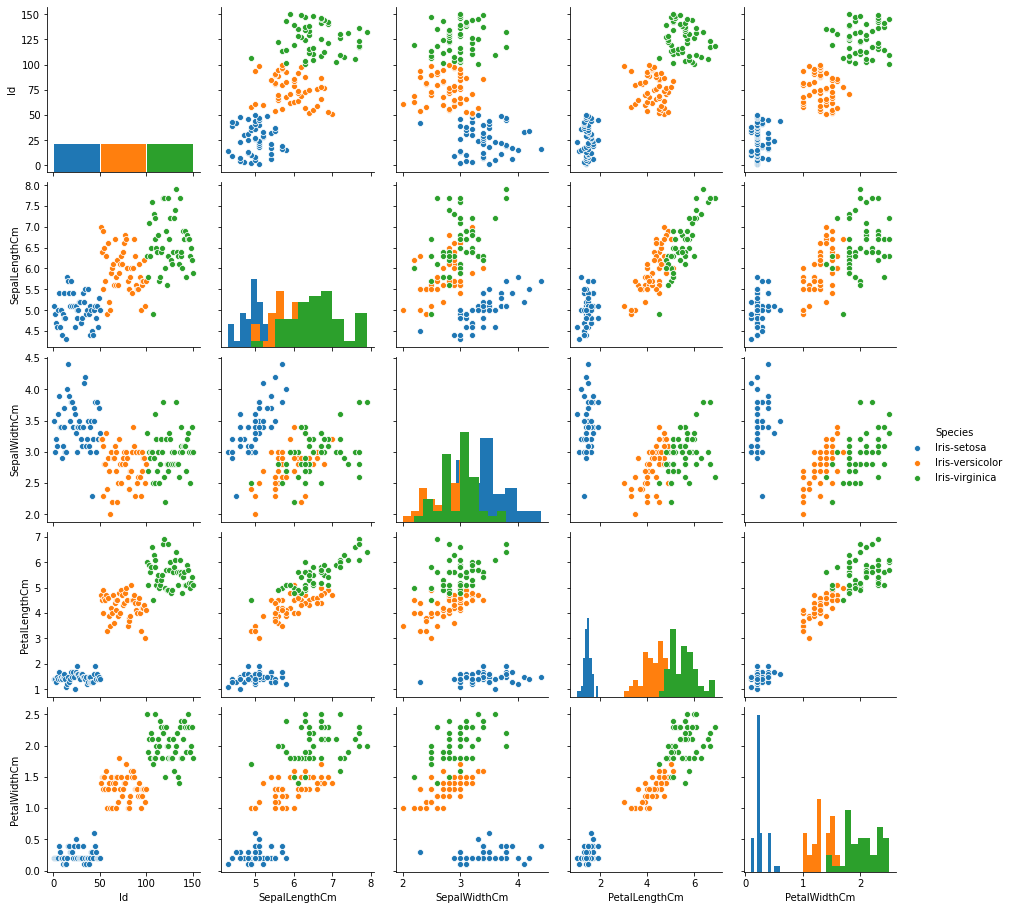

In [46]:
# To See the pairplot
sns.pairplot(data=ds,hue="Species", hue_order=None, palette=None, kind='scatter', diag_kind='hist', markers=None, height=2.5)
plt.show()

<Figure size 1800x360 with 0 Axes>

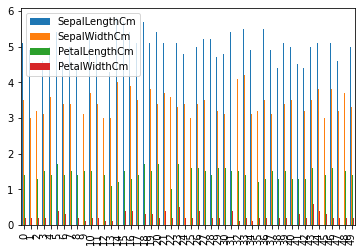

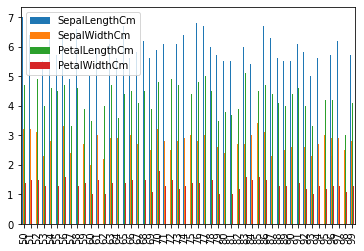

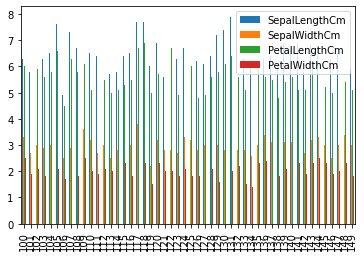

In [54]:
plt.figure(figsize=(25,5))
part = ds.iloc[:,1:]
part.groupby('Species').plot.bar()
plt.show()

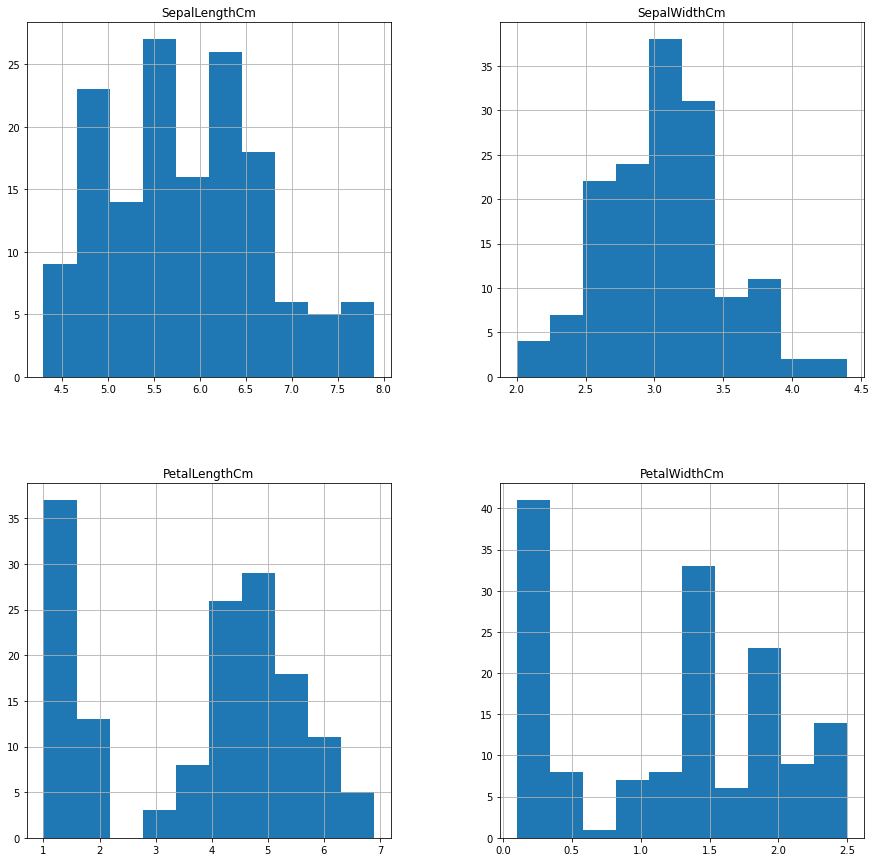

In [57]:
part.hist(figsize=(15,15))
plt.show()

In [72]:
feature_v = ds[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
target_v = ds["Species"].values

In [74]:
feature_v

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [75]:
target_v

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [77]:
feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
target_name=['setosa', 'versicolor', 'virginica']

In [62]:
# Select feature data and target data
X = part.iloc[:,:-1]
y = part.iloc[:,-1]

In [67]:
# to devide dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state = 42)

In [76]:
# To load the DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
c_pred=dtc.predict(X_test)

In [86]:
print("Confusion Matrix:",confusion_matrix(c_pred,y_test))

Confusion Matrix: [[19  0  0]
 [ 0 17  1]
 [ 0  0 16]]


In [87]:
print("Classification Report:",classification_report(c_pred,y_test))

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53



In [85]:
print("Accuracy of Test data :",accuracy_score(c_pred,y_test)*100,"%")

Accuracy of Test data : 98.11320754716981 %


In [89]:
# Creat DataFrame to comparing Actual vs Predicted
df=pd.DataFrame({'Actual': y_test, 'Predicted': c_pred})
df.reset_index()

,index,Actual,Predicted
0,73,Iris-versicolor,Iris-versicolor
1,18,Iris-setosa,Iris-setosa
2,118,Iris-virginica,Iris-virginica
3,78,Iris-versicolor,Iris-versicolor
4,76,Iris-versicolor,Iris-versicolor
5,31,Iris-setosa,Iris-setosa
6,64,Iris-versicolor,Iris-versicolor
7,141,Iris-virginica,Iris-virginica
8,68,Iris-versicolor,Iris-versicolor
9,82,Iris-versicolor,Iris-versicolor


<AxesSubplot:>

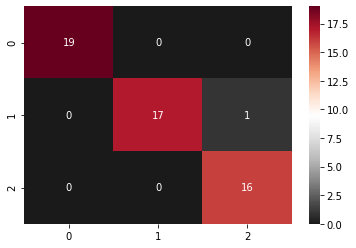

In [93]:
sns.heatmap(confusion_matrix(c_pred,y_test),annot = True,cmap = 'RdGy_r')

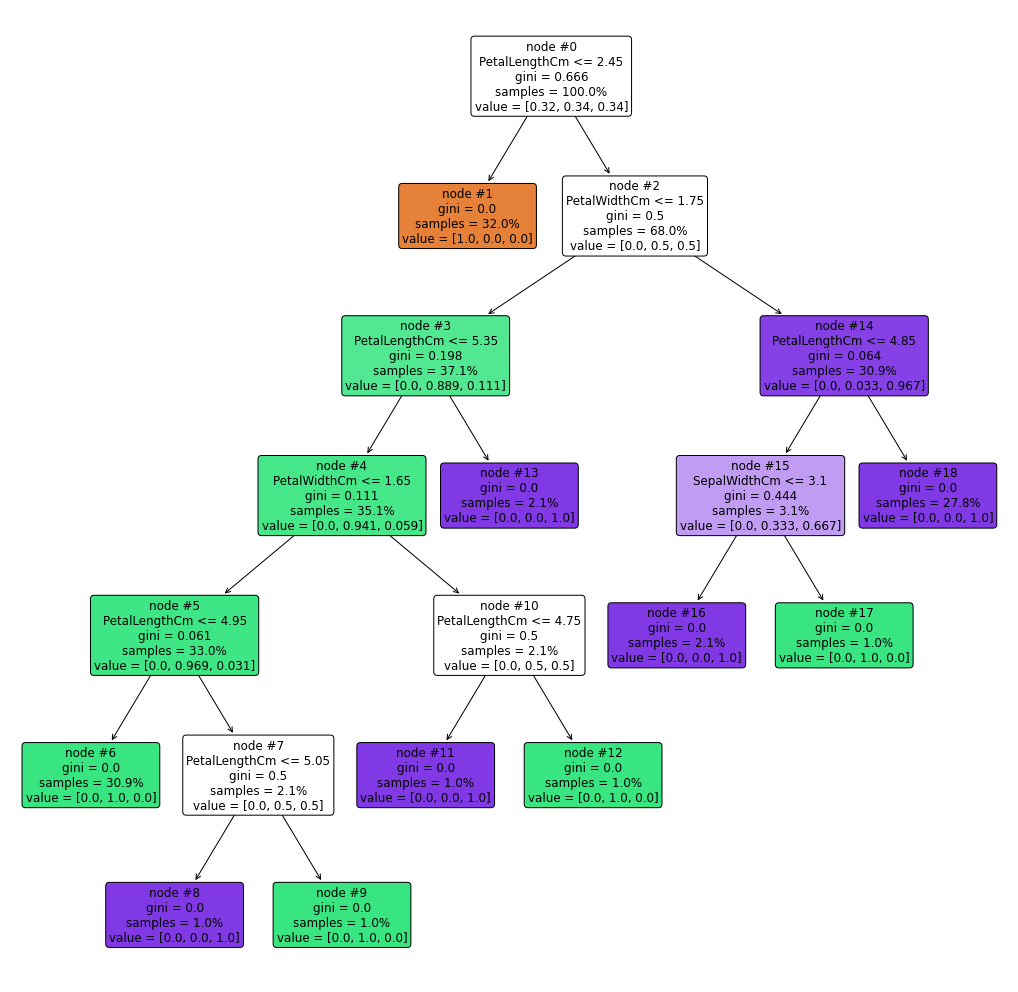

In [94]:
from sklearn import tree
plt.figure(figsize = (18,18))
tree.plot_tree(dtc,filled = True,rounded = True,proportion = True,node_ids = True , feature_names = feature_names)
plt.show()

In [98]:
# To Predict for class X.
dtc.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

# Thank you